#Оценка стоимости автомобиля

##1. Описание задачи
Датасет содержит более 19000 записей об автомобилях и их признаках, включающих стоимость. Требуется предсказать цену автомобиля по остальным признакам. Это задача восстановления регрессии.

##Описание признаков
- ID - идентификатор автомобиля
- Price - цена автомобиля (в долларах США)
- Levy - годовой налоговый сбор в (долларах США)
- Manufacturer - производитель
- Model - модель
- Prod. year - год выпуска
- Category - тип автомобиля (джип, седан и т.д.)
- Leather interior - кожаный салон
- Fuel type - тип топлива
- Engine volume - объём двигателя
- Mileage - пробег (км)
- Cylinders - число цилиндров в двигателе
- Gear box type - тип коробки передач
- Drive wheels - привод
- Doors - сколько дверный автомобиль
- Wheel - с какой стороны руль
- Color - цвет автомобиля
- Airbags - колличество подушек безопасности


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.model_selection

In [2]:
url = "https://raw.githubusercontent.com/TriangularSquare/ML/main/car_price_prediction.csv"
dataset = pd.read_csv(url)

In [3]:
# Число объектов и признаков
dataset.shape

(19237, 18)

In [4]:
dataset.head(15)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4
6,45656768,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4.0,Automatic,Front,04-May,Left wheel,White,12
7,45816158,549,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
8,45641395,1098,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
9,45756839,26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

##Подготовка датасета

In [6]:
# Проверим повторяющиеся записи
dataset.duplicated().sum()

313

In [7]:
# Удалим повторяющиеся значения
dataset.drop_duplicates(inplace= True)

In [8]:
# Проверим пропущенные значения
dataset.isna().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [9]:
# Проверим количество уникальных значений признаков
dataset.nunique()

ID                  18924
Price                2315
Levy                  559
Manufacturer           65
Model                1590
Prod. year             54
Category               11
Leather interior        2
Fuel type               7
Engine volume         107
Mileage              7687
Cylinders              13
Gear box type           4
Drive wheels            3
Doors                   3
Wheel                   2
Color                  16
Airbags                17
dtype: int64

Удалим поля ID и Doors. ID удаляется исходя из того, что он не несет никакой информации об автомобиле. Значения Doors уже отчасти учтены в поле Category (тип автомобиля)

In [10]:
dataset=dataset.drop(['ID','Doors'],axis=1)

Заменим значения '-' в поле Levy на 0, и конвертируем их в float

In [11]:
dataset['Levy'] = dataset['Levy'].replace('-','0')
dataset['Levy'] = dataset['Levy'].astype('float64')

У значений поля Milliage нужно убрать 'km' и конвертировать их в int

In [12]:
dataset['Mileage'] = dataset['Mileage'].str.replace('km',"")
dataset.Mileage = dataset.Mileage.astype('Int64')

У значений поля Engine volume нужно убрать 'Turbo' и конвертировать их в float

In [13]:
dataset['Engine volume'] = dataset['Engine volume'].str.replace('Turbo','')
dataset['Engine volume'] = dataset['Engine volume'].astype('float64')

Конечная версия датасета будет выглядеть следующим образом

In [14]:
dataset.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,Left wheel,Silver,12
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,Left wheel,Black,8
2,8467,0.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,Black,2
3,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,Left wheel,White,0
4,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,Left wheel,Silver,4


In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  float64
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Prod. year        18924 non-null  int64  
 5   Category          18924 non-null  object 
 6   Leather interior  18924 non-null  object 
 7   Fuel type         18924 non-null  object 
 8   Engine volume     18924 non-null  float64
 9   Mileage           18924 non-null  Int64  
 10  Cylinders         18924 non-null  float64
 11  Gear box type     18924 non-null  object 
 12  Drive wheels      18924 non-null  object 
 13  Wheel             18924 non-null  object 
 14  Color             18924 non-null  object 
 15  Airbags           18924 non-null  int64  
dtypes: Int64(1), float64(3), int64(3), objec

In [16]:
dataset.shape

(18924, 16)

In [17]:
dataset['Manufacturer'] = dataset['Manufacturer'].astype('category')
dataset['Model'] = dataset['Model'].astype('category')
dataset['Category'] = dataset['Category'].astype('category')
dataset['Leather interior'] = dataset['Leather interior'].astype('category')
dataset['Fuel type'] = dataset['Fuel type'].astype('category')
dataset['Gear box type'] = dataset['Gear box type'].astype('category')
dataset['Drive wheels'] = dataset['Drive wheels'].astype('category')
dataset['Wheel'] = dataset['Wheel'].astype('category')
dataset['Color'] = dataset['Color'].astype('category')

##2. Визуализация данных, борьба с выбросами

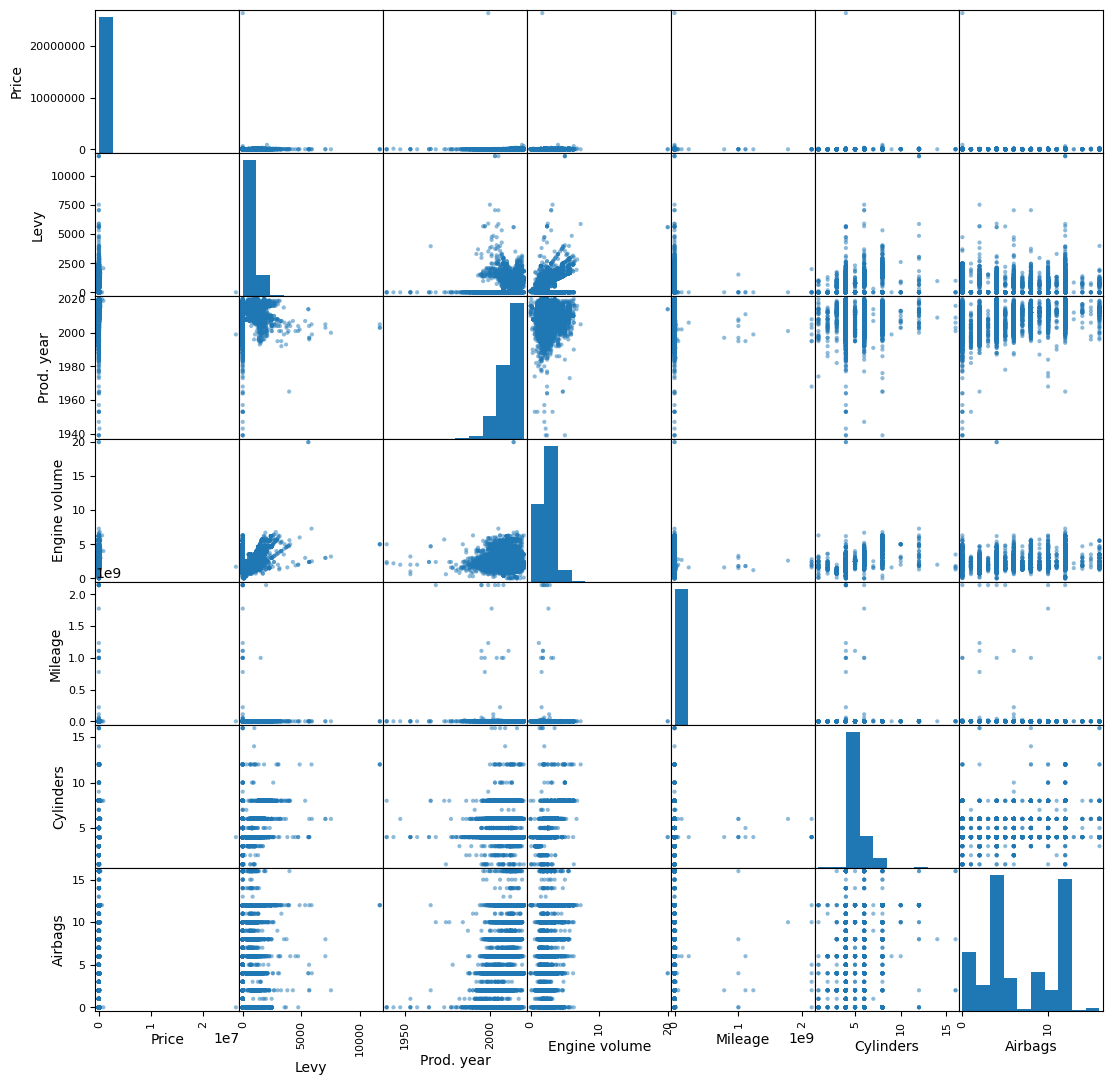

In [18]:
# Построим матрицу диаграмм рассеивания
pd.plotting.scatter_matrix(dataset, figsize = (13, 13))
pass

<ipython-input-19-e49254aac435>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = dataset.select_dtypes(exclude=object).corr()


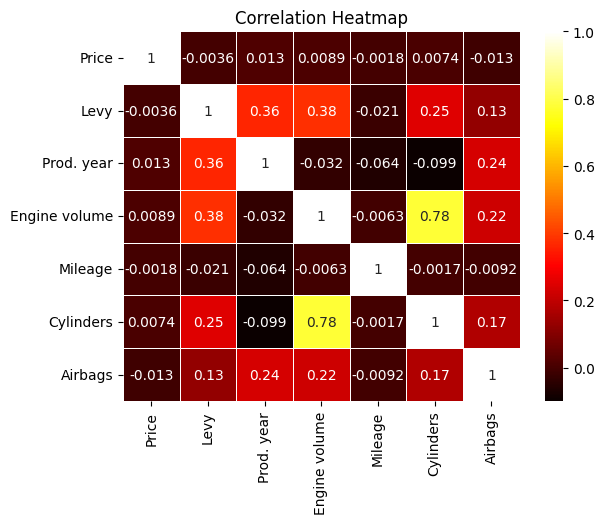

In [19]:
cor = dataset.select_dtypes(exclude=object).corr()
sns.heatmap(cor, annot= True, linewidths= 0.5,cmap='hot')
plt.title('Correlation Heatmap')
plt.show()

In [20]:
dataset['Price'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005        30.0
0.010        45.0
0.050       314.0
0.100       627.0
0.500     13172.0
0.900     38737.0
0.950     49410.3
0.990     84675.0
0.995    103491.0
Name: Price, dtype: float64

Можем заметить, что некоторые значения стоимости автомобиля выглядят неадекватными, например выходящие за пределы квантиля 0.1. Попробуем отбросить строки со значениями параметров, которые выходят за пределы квантилей 0.005 и 0.900 и строки, цена в которых не адекватна.

In [21]:
rows_to_drop = dataset[
    (dataset['Price'] < dataset['Price'].quantile(0.100)) | (dataset['Price'] > dataset['Price'].quantile(0.900)) |
    (dataset['Levy']  < dataset['Levy'].quantile(0.005)) | (dataset['Levy']  > dataset['Levy'].quantile(0.995)) |
    (dataset['Prod. year']  < dataset['Prod. year'].quantile(0.005)) | (dataset['Prod. year']  > dataset['Prod. year'].quantile(0.995)) |
    (dataset['Engine volume']  < dataset['Engine volume'].quantile(0.005)) | (dataset['Engine volume']  > dataset['Engine volume'].quantile(0.995)) |
    (dataset['Mileage']  < dataset['Mileage'].quantile(0.005)) | (dataset['Mileage']  > dataset['Mileage'].quantile(0.995)) |
    (dataset['Cylinders']  < dataset['Cylinders'].quantile(0.005)) | (dataset['Cylinders']  > dataset['Cylinders'].quantile(0.995)) |
    (dataset['Airbags']  < dataset['Airbags'].quantile(0.005)) | (dataset['Airbags']  > dataset['Airbags'].quantile(0.995))].index
dataset = dataset.drop(rows_to_drop)
dataset.shape

(14753, 16)

Количество данных изменилось некритично. Выбросить больше уже нельзя.


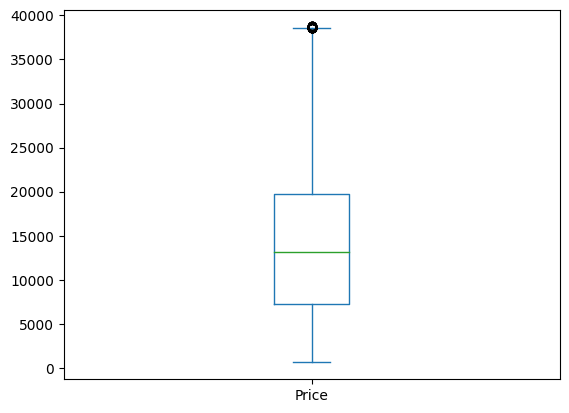

In [22]:
dataset['Price'].plot(kind='box')
pass

##3. Обработка категориальных признаков

Закодируем категориальные признаки с помощью числовых принаков.

In [23]:
dataset = pd.get_dummies(dataset)

##4. Нормализация признаков

Нормализацию проведём методом стандартизации:

In [24]:
dataset_normalized = (dataset - dataset.mean(axis = 0)) / dataset.std(axis = 0)
dataset_normalized.describe()

,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Manufacturer_ACURA,Manufacturer_ALFA ROMEO,Manufacturer_ASTON MARTIN,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
count,1.475300e+04,1.475300e+04,1.475300e+04,1.475300e+04,14753.0,1.475300e+04,1.475300e+04,1.475300e+04,1.475300e+04,0.0,...,1.475300e+04,1.475300e+04,1.475300e+04,14753.000000,1.475300e+04,1.475300e+04,1.475300e+04,1.475300e+04,1.475300e+04,1.475300e+04
mean,4.816259e-17,5.093194e-17,-1.377450e-15,2.119154e-17,0.0,1.223330e-16,-4.527284e-17,2.504455e-17,1.155902e-17,NaN,...,-3.082406e-17,-7.296633e-17,-1.107740e-17,0.000000,1.372634e-17,-3.371382e-18,1.155902e-17,2.697105e-17,-6.453787e-17,-3.082406e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,NaN,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.480136e+00,-1.191139e+00,-3.714786e+00,-1.601364e+00,-1.440458,-1.465069e+00,-1.565916e+00,-2.604308e-02,-1.646774e-02,NaN,...,-1.362753e-01,-3.668449e-01,-1.291351e-01,-0.038644,-4.734655e-02,-1.897968e-01,-5.194436e-01,-8.587218e-02,-5.426265e-01,-7.790298e-02
25%,-7.602717e-01,-1.191139e+00,-4.820922e-01,-6.904109e-01,-0.671774,-4.805038e-01,-5.985174e-01,-2.604308e-02,-1.646774e-02,NaN,...,-1.362753e-01,-3.668449e-01,-1.291351e-01,-0.038644,-4.734655e-02,-1.897968e-01,-5.194436e-01,-8.587218e-02,-5.426265e-01,-7.790298e-02
50%,-1.089398e-01,1.107792e-01,2.785416e-01,-3.000022e-01,-0.136112,-4.805038e-01,-1.148183e-01,-2.604308e-02,-1.646774e-02,NaN,...,-1.362753e-01,-3.668449e-01,-1.291351e-01,-0.038644,-4.734655e-02,-1.897968e-01,-5.194436e-01,-8.587218e-02,-5.426265e-01,-7.790298e-02
75%,6.108153e-01,5.623822e-01,6.588585e-01,3.506789e-01,0.456294,-4.805038e-01,1.336279e+00,-2.604308e-02,-1.646774e-02,NaN,...,-1.362753e-01,-3.668449e-01,-1.291351e-01,-0.038644,-4.734655e-02,-1.897968e-01,-5.194436e-01,-8.587218e-02,-5.426265e-01,-7.790298e-02
max,2.685371e+00,3.802939e+00,1.609651e+00,4.515038e+00,6.324013,3.457759e+00,2.061828e+00,3.839531e+01,6.072067e+01,NaN,...,7.337589e+00,2.725763e+00,7.743303e+00,25.875578,2.111943e+01,5.268435e+00,1.925006e+00,1.164443e+01,1.842763e+00,1.283561e+01


##5. Разбиение выборки на обучающую и тестовую

In [25]:
x = dataset_normalized.drop(['Price'], axis=1)
y = dataset['Price']
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2, random_state=42)

N_train, _ = x_train.shape
N_test,  _ = x_test.shape

##6. Регрессия с LASSO

Регрессия с LASSO - регуляризованная модель, устойчивая к зашумленным данным. Полезна при наличии большого числа признаков.

In [26]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
imputer = SimpleImputer()

x_train = imputer.fit_transform(x_train)

lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.055e+10, tolerance: 9.940e+07
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [27]:
y_train_predict = lasso.predict(x_train)
RSS = ((y_train_predict - y_train)**2).sum()
RSS/N_train, (RSS/N_train)**.5

(40972945.351014316, 6401.01127565124)

In [28]:
x_test = imputer.fit_transform(x_test)

In [29]:
y_train_predict = lasso.predict(x_train)
y_test_predict  = lasso.predict(x_test)

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

MSE_train, MSE_test, R2_train, R2_test

(40972945.351014316,
 44557300.481660485,
 0.5135168989567054,
 0.45389947011520415)

In [31]:
MSE_train = ((y_train_predict - y_train)**2).mean()
MSE_test  = ((y_test_predict - y_test)**2).mean()
MSE_train, MSE_test

(40972945.351014316, 44557300.481660485)

In [32]:
lasso.score(x_train, y_train) # Коэффициент детерминации R^2

0.5135168989567054

In [33]:
RMSE_train = (MSE_train)**(.5)
RMSE_test = (MSE_test)**(.5)
RMSE_train, RMSE_test

(6401.01127565124, 6675.12550306438)

##7. Градиентный бустинг регрессии

 Градиентный бустинг регрессии подходит для предсказания числовых значений

In [34]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression

In [35]:
reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
reg.fit(x_train, y_train)

predictions = reg.predict(x_test)

#RMSE
np.sqrt(mean_squared_error(y_test, predictions))

5695.930534444061

#Выводы
- ошибка градиентного бустинга регрессии меньше, чем для регрессии с LASSO
- нет такого признака, который бы вносил заметно больший вклад в итоговую стоимость, чем остальные